Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [13]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [18]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

## Fixing Data Types

In [19]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [20]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [21]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Problems in the Data

In [50]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for row in daily_engagement:
    row['account_key'] = row['acct']
    del row['acct']

KeyError: 'acct'

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [55]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def count_unique_students(data, label):
    unique_data = set()
    for item in data:
        unique_data.add(item[label])
    return unique_data

enrollments_rows_number = len(enrollments)
daily_engagements_rows_number = len(daily_engagement)
project_submissions_rows_number = len(project_submissions)

unique_enrollments_rows = count_unique_students(enrollments, 'account_key')
unique_daily_engagements_rows = count_unique_students(daily_engagement, 'account_key')
unique_project_submissions_rows = count_unique_students(project_submissions, 'account_key')

unique_enrollments_rows_number = len(unique_enrollments_rows)
unique_daily_engagements_rows_number = len(unique_daily_engagements_rows)
unique_project_submissions_rows_number = len(unique_project_submissions_rows)

print(enrollments_rows_number, daily_engagements_rows_number, project_submissions_rows_number)
print(unique_enrollments_rows_number, unique_daily_engagements_rows_number, unique_project_submissions_rows_number)

1640 136240 3642
1302 1237 743


## Missing Engagement Records

In [69]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
missing_students_account_keys = unique_enrollments_rows.difference(unique_daily_engagements_rows)
missing_students = []

for enrollment in enrollments:
    if enrollment['account_key'] in missing_students_account_keys:
        missing_students.append(enrollment)

missing_students[0]

OrderedDict([('account_key', '1219'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 12, 0, 0)),
             ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)),
             ('days_to_cancel', 0),
             ('is_udacity', False),
             ('is_canceled', True)])

## Checking for More Problem Records

In [77]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
remainings = 0

for row in missing_students:
    if row['days_to_cancel'] != 0:
        remainings += 1
        print(row, '\n')
remainings

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)]) 

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)]) 

OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)]) 



3

## Tracking Down the Remaining Problems

In [78]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [79]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for item in data:
        if item['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(item)
    return non_udacity_data

In [83]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments), len(non_udacity_engagement), len(non_udacity_submissions))

1622 135656 3634


## Refining the Question

In [147]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for item in non_udacity_enrollments:
    if not item['is_canceled'] or item['days_to_cancel'] > 7:
        
        if item['account_key'] not in paid_students or item['join_date'] > paid_students[item['account_key']]:
            paid_students[item['account_key']] = item['join_date']
        

len(paid_students)

995

## Getting Data from First Week

In [205]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [206]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for item in data:
        if item['account_key'] in paid_students:
            new_data.append(item)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

# print(len(paid_enrollments), len(paid_engagement), len(paid_submissions))

paid_engagement_in_first_week = []

for item in paid_engagement:
    account_key = item['account_key']
    join_date = paid_students[account_key]
    item_date = item['utc_date']
    if within_one_week(join_date, item_date):
        paid_engagement_in_first_week.append(item)

# paid_engagement_in_first_week
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [260]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for item in paid_engagement_in_first_week:
    account_key = item['account_key']
    engagement_by_account[account_key].append(item)
    
# engagement_by_account
paid_engagement_in_first_week

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.2848873333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 53.6337463333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 33.4892

In [208]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

total_minutes_by_account

{'0': 494.88049616599994,
 '1': 18.576384666670002,
 '10': 130.12347833367,
 '100': 145.70615016660003,
 '1000': 180.025886167,
 '1001': 16.2005246667,
 '1002': 8.1809285,
 '1007': 0.0,
 '1009': 0.0,
 '101': 148.7306783333,
 '1011': 118.71332966671,
 '1013': 4.3800225,
 '1014': 619.9953998326,
 '1015': 38.87817050003,
 '1019': 75.87298200000001,
 '102': 277.0299235,
 '1022': 0.0,
 '1028': 18.8601366667,
 '1029': 3.50885666667,
 '103': 1075.0625133337,
 '1030': 218.55650866673005,
 '1031': 11.741084,
 '1032': 13.899305166700001,
 '1033': 959.9534376661,
 '1036': 0.0,
 '1038': 0.0,
 '104': 839.123771167,
 '1040': 12.9824898333,
 '1042': 45.5670335,
 '1048': 0.0,
 '1049': 37.853095,
 '105': 312.1800340007,
 '1050': 84.5200338333,
 '1052': 117.195806333,
 '1053': 81.4415533333,
 '1054': 0.0,
 '1055': 71.5736406667,
 '1056': 366.5285674997,
 '1058': 0.0,
 '106': 29.0687406666,
 '1060': 1768.5227493319999,
 '1062': 366.3194163334,
 '1066': 0.0,
 '1067': 29.7377383333,
 '107': 171.2928940001,

In [209]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()

# Numpy mean,std,min,max like functions get list as parameter
# That's why total_minutes converted to the list version
total_minutes_list = list(total_minutes)

print('Mean:', np.mean(total_minutes_list))
print('Standard deviation:', np.std(total_minutes_list))
print('Minimum:', np.min(total_minutes_list))
print('Maximum:', np.max(total_minutes_list))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [212]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for key, value in total_minutes_by_account.items():
    if value > max_minutes:
        max_minutes = value
        student_with_max_minutes = key
        
for item in paid_engagement_in_first_week:
    if item['account_key'] == student_with_max_minutes:
        print(item, '\n')

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_c

## Lessons Completed in First Week

In [218]:
def get_weekly_information(label):
    total_items_by_account = {}
    
    for account_key, engagement_for_student in engagement_by_account.items():
        total_items = 0
        for engagement_record in engagement_for_student:
            total_items += engagement_record[label]
        total_items_by_account[account_key] = total_items
    
    return total_items_by_account

In [219]:
def print_statistics(total_items_by_account):
    
    # Summarize the data about minutes spent in the classroom
    total_items = total_items_by_account.values()

    # Numpy mean,std,min,max like functions get list as parameter
    # That's why total_minutes converted to the list version
    total_items_list = list(total_items)

    print('Mean:', np.mean(total_items_list))
    print('Standard deviation:', np.std(total_items_list))
    print('Minimum:', np.min(total_items_list))
    print('Maximum:', np.max(total_items_list))






In [220]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = get_weekly_information('lessons_completed')

print_statistics(total_lessons_by_account)

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [227]:
def get_weekly_information_by_visits(label):
    total_items_by_account = {}
    
    for account_key, engagement_for_student in engagement_by_account.items():
        total_items = 0
        for engagement_record in engagement_for_student:
            if engagement_record[label] > 0:
                total_items += 1
        total_items_by_account[account_key] = total_items
    
    return total_items_by_account

In [229]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total_days_by_account = get_weekly_information_by_visits('num_courses_visited')
print_statistics(total_days_by_account)

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [249]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for item in paid_submissions:
    if item['lesson_key'] in subway_project_lesson_keys and \
        (item['assigned_rating'] == 'PASSED' or item['assigned_rating'] == 'DISTINCTION'):
            pass_subway_project.add(item['account_key'])

len(pass_subway_project)

647

In [250]:
passing_engagement = []
non_passing_engagement = []

for item in paid_engagement_in_first_week:
    if item['account_key'] in pass_subway_project:
        passing_engagement.append(item)
    else:
        non_passing_engagement.append(item)

print( len(passing_engagement), len(non_passing_engagement) )

4527 2392


## Comparing the Two Student Groups

In [263]:
def get_statistics(data, label):
    total_items_by_account = {}
    
    for key, value in data.items():
        total_items = 0
        for item in value:
            total_items += item[label]
        total_items_by_account[key] = total_items
    
    return total_items_by_account

In [285]:
def get_statistics2(data, label):
    total_items_by_account = {}
    
    for key, value in data.items():
        total_items = 0
        for item in value:
            if item['num_courses_visited'] > 0:
                total_items += 1
        total_items_by_account[key] = total_items
    
    return total_items_by_account

In [297]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# The keys are account keys, and the values are lists of engagement records.
passing_engagement_by_account = defaultdict(list)
for item in passing_engagement:
    account_key = item['account_key']
    passing_engagement_by_account[account_key].append(item)
    
non_passing_engagement_by_account = defaultdict(list)
for item in non_passing_engagement:
    account_key = item['account_key']
    non_passing_engagement_by_account[account_key].append(item)
    
passing_students_by_lessons = get_statistics(passing_engagement_by_account, 'lessons_completed')
non_passing_students_by_lessons = get_statistics(non_passing_engagement_by_account, 'lessons_completed')

passing_students_by_minutes = get_statistics(passing_engagement_by_account, 'total_minutes_visited')
non_passing_students_by_minutes = get_statistics(non_passing_engagement_by_account, 'total_minutes_visited')

passing_students_by_days = get_statistics2(passing_engagement_by_account, 'total_minutes_visited')
non_passing_students_by_days = get_statistics2(non_passing_engagement_by_account, 'total_minutes_visited')

print_statistics(passing_students_by_lessons)
print('\n')
print_statistics(non_passing_students_by_lessons)

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


## Making Histograms

(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

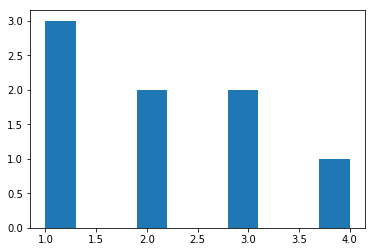

In [318]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

In [321]:
def histogram(data):
    data_list = data.values()
    plt.hist(data_list, bins=8)

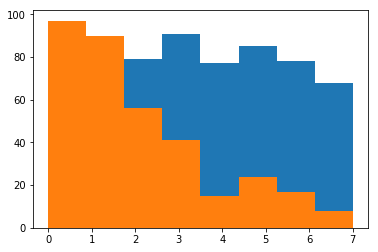

In [327]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

# histogram(passing_students_by_lessons)
# histogram(non_passing_students_by_lessons)

# histogram(passing_students_by_minutes)
# histogram(non_passing_students_by_minutes)

histogram(passing_students_by_days)
histogram(non_passing_students_by_days)

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

In [329]:
import pandas as pd
daily_engagement = pd.read_csv('daily_engagement_full.csv')
len(daily_engagement['acct'].unique())

1237